# Risk Analysis of Boeing 737

> This report is the Python version my Final Thesis report. My Thesis report titled "Risk comparison on all continents for Boeing 737" is completely analysed using Miscrosoft Excel --> Pivot Tables & Power Query.

The main aim of this project is to analyse and compare the Boeing 737 family aircraft across all the continents in terms of safety and dependability from 1969 to 2020. This comparison overlays the risk of Boeing 737 family aircraft in each year and gives a detailed perspective on the safety issue on each continent. The data were collected from the first recorded flight of the Boeing 737 family from 1969 to April 2020, with 51 years, a total of 491 accidents with 5700 fatalities were recorded.

The motivation behind the measurement of risk value is to get the comparative risk estimation of Boeing 737 aircraft accidents and to improve safety measures to reduce the fatality rate. The geographical analysis shows the risk that each continent possesses and also denotes the improvement in the safety measures on each continent.

### This analysis has been completely analysed using Python, including packages numpy, pandas & matplotlib.

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(18,8))

<Figure size 1296x576 with 0 Axes>

<Figure size 1296x576 with 0 Axes>

The input data is available in the form of an Excel file and each sheet comprises of vital data.

> The data has been manually collected and registered into the Excel file.

1. Source Sheet --> Boeing 737 aircrafts accidents entries --> collected from [Accidents database](https://aviation-safety.net/database/types/Boeing-737-series/index).
2. B737_orders_&_accidents Sheet --> Boeing 737 aircrafts order history & accidents entries --> collected from [Order & Accidents database](http://www.b737.org.uk/sales.htm).
3. B737_Prices --> Each Boeing 737 aircrafts cost entries --> collected from [Each Boeing 737 Price database](https://www.boeing.com/company/about-bca/).

In [2]:
source_sht = pd.read_excel('b737.xlsx', sheet_name='Source')
order_sht = pd.read_excel('b737.xlsx', sheet_name='B737_orders_&_accidents')
price_sht = pd.read_excel('b737.xlsx', sheet_name='B737_Prices')

Here the source sheet is the important sheet, as it holds the accidents entry. The overview of the source sheet...

In [3]:
source_sht.head()

,Date,Year,Operator,Aircraft Model,Type,Flight Cycles,Fight Nature,First Flight,Total Airframe Hours,Time,Cause,Type of Mechanical Failure,Phase,Fatality,Category,Aircraft Damage,Location,Country,Continent,Ground Casualties
0,25343,1969,Avianca,Boeing 737-159,Boeing 737-100,NaN,Domestic Scheduled Passenger,25135.0,NaN,NaN,Sabotage,NaN,En Route,0,Cat-1,No,"Havana-José Martí International Airport (HAV),...",Cuba,North America,NaN
1,25683,1970,VASP - Viação Aérea São Paulo,Boeing 737-2A1,Boeing 737-200,NaN,Unknown,25382.0,NaN,NaN,Sabotage,NaN,Unknown,0,Cat-1,No,"Guyana, Cuba",NaN,North America,NaN
2,25702,1970,VASP - Viação Aérea São Paulo,Boeing 737-200,Boeing 737-200,NaN,Unknown,NaN,NaN,NaN,Sabotage,NaN,Unknown,0,Cat-1,No,"Guyana, Curacao",Curacao,South America,NaN
3,25745,1970,Avianca,Boeing 737-159,Boeing 737-100,NaN,Domestic Scheduled Passenger,25135.0,NaN,NaN,Sabotage,NaN,En Route,0,Cat-1,No,"Havana-José Martí International Airport (HAV),...",Cuba,North America,NaN
4,25768,1970,United Airlines,Boeing 737-222,Boeing 737-200,NaN,Domestic Scheduled Passenger,24897.0,3956.0,0.796528,Manufacting Defects,Engine Failure,Take Off,0,Cat-1,Yes,"Philadelphia International Airport, PA (PHL), USA",USA,North America,NaN


In [4]:
source_sht.isna().sum()

Date                            0
Year                            0
Operator                        1
Aircraft Model                  0
Type                            0
Flight Cycles                 397
Fight Nature                    0
First Flight                   71
Total Airframe Hours          336
Time                          164
Cause                           0
Type of Mechanical Failure    417
Phase                           0
Fatality                        0
Category                        0
Aircraft Damage                 0
Location                        0
Country                         2
Continent                       0
Ground Casualties             478
dtype: int64

## Data cleaning

As you can clearly see, there are lot of entries with NA. The parameters like 'Flight Cycles', 'Total Airframe Hours' & 'Time' are important, but many NA in this columns make it not very usefull! So, we need to perform data cleaning by droping NAs.

Many features might have been played a vital role in a typical data analysis, but with the risk analysis, we only require the risk provoiding features.

In [70]:
# First dropping NAs
source_sht_sort = source_sht.dropna(axis=1)

# Dropping the unnecessary columns 

col_drop = ['Date', 'Aircraft Model']

source_sht_sort = source_sht_sort.drop(columns=col_drop)
source_sht_sort

,Year,Type,Fight Nature,Cause,Phase,Fatality,Category,Aircraft Damage,Location,Continent
0,1969,Boeing 737-100,Domestic Scheduled Passenger,Sabotage,En Route,0,Cat-1,No,"Havana-José Martí International Airport (HAV),...",North America
1,1970,Boeing 737-200,Unknown,Sabotage,Unknown,0,Cat-1,No,"Guyana, Cuba",North America
2,1970,Boeing 737-200,Unknown,Sabotage,Unknown,0,Cat-1,No,"Guyana, Curacao",South America
3,1970,Boeing 737-100,Domestic Scheduled Passenger,Sabotage,En Route,0,Cat-1,No,"Havana-José Martí International Airport (HAV),...",North America
4,1970,Boeing 737-200,Domestic Scheduled Passenger,Manufacting Defects,Take Off,0,Cat-1,Yes,"Philadelphia International Airport, PA (PHL), USA",North America
...,...,...,...,...,...,...,...,...,...,...
486,2019,Boeing 737-400,International Scheduled Passenger,Landing Gear Structural Damage,Landing,0,Cat-1,Substantial,"Bogotá-Eldorado Airport (BOG), Colombia",South America
487,2019,Boeing 737-800,Domestic Scheduled Passenger,Landing Gear Structural Damage,Landing,0,Cat-1,Substantial,"Denver International Airport, CO (DEN), USA",North America
488,2020,Boeing 737-800,International Scheduled Passenger,Sabotage,En Route,176,Cat-5,Yes,"Near Sabashahr, Iran",Asia
489,2020,Boeing 737-800,Domestic Scheduled Passenger,Weather,Landing,3,Cat-2,Yes,Istanbul-Sabiha Gökçen International Airport (...,Europe


The location is only usefull to categorize the accident locations in a continent. So, we have to shorten the location, with only the name of the country.

In [6]:
# Function to extract the country name.

def country_extracter(string):
    str_split = string.split(',')
    return str_split[-1]

source_sht_sort['Country'] = source_sht_sort['Location'].apply(country_extracter)

source_sht_sort.drop(columns='Location', inplace=True)

source_sht_sort

,Year,Type,Fight Nature,Cause,Phase,Fatality,Category,Aircraft Damage,Continent,Country
0,1969,Boeing 737-100,Domestic Scheduled Passenger,Sabotage,En Route,0,Cat-1,No,North America,Cuba
1,1970,Boeing 737-200,Unknown,Sabotage,Unknown,0,Cat-1,No,North America,Cuba
2,1970,Boeing 737-200,Unknown,Sabotage,Unknown,0,Cat-1,No,South America,Curacao
3,1970,Boeing 737-100,Domestic Scheduled Passenger,Sabotage,En Route,0,Cat-1,No,North America,Cuba
4,1970,Boeing 737-200,Domestic Scheduled Passenger,Manufacting Defects,Take Off,0,Cat-1,Yes,North America,USA
...,...,...,...,...,...,...,...,...,...,...
486,2019,Boeing 737-400,International Scheduled Passenger,Landing Gear Structural Damage,Landing,0,Cat-1,Substantial,South America,Colombia
487,2019,Boeing 737-800,Domestic Scheduled Passenger,Landing Gear Structural Damage,Landing,0,Cat-1,Substantial,North America,USA
488,2020,Boeing 737-800,International Scheduled Passenger,Sabotage,En Route,176,Cat-5,Yes,Asia,Iran
489,2020,Boeing 737-800,Domestic Scheduled Passenger,Weather,Landing,3,Cat-2,Yes,Europe,Turkey


Now, the data looks clean and in the correct order. So, we can start our analysing..

Here is a short summary of this data with regards to the total number of accident in each continent.

In [7]:
source_sht_sort.groupby('Continent')['Continent'].count()

Continent
Africa            67
Antarctica         4
Asia             158
Australia          4
Europe            87
North America    120
South America     51
Name: Continent, dtype: int64

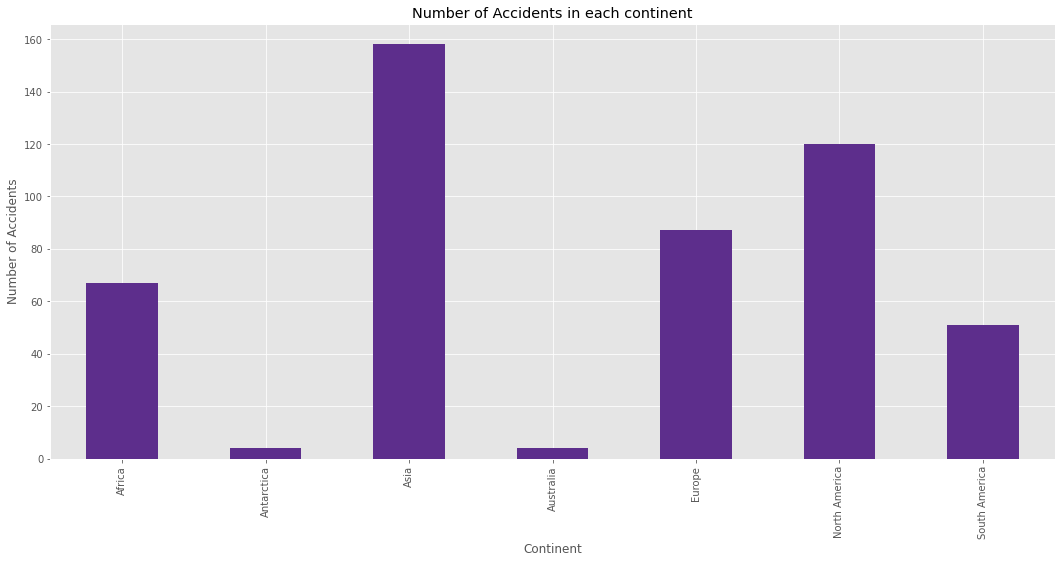

In [8]:
plt.figure(figsize=(18,8))
source_sht_sort.groupby('Continent')['Continent'].count().plot(kind='bar', color='#5d2e8c')
plt.title('Number of Accidents in each continent')
plt.ylabel('Number of Accidents')
plt.show()

Here is the same data represented with the Year index. It is represented as a Pivot table!!

In [9]:
source_sht_sort.pivot_table(index='Year', columns='Continent',\
                            values='Fatality', aggfunc= np.sum, \
                            margins='All', margins_name='Total', \
                            fill_value=0)

Continent,Africa,Antarctica,Asia,Australia,Europe,North America,South America,Total
Year,,,,,,,,
1969,0,0,0,0,0,0,0,0
1970,0,0,0,0,3,0,0,3
1971,0,0,0,0,0,0,0,0
1972,0,0,0,0,0,48,0,48
1973,0,0,49,0,0,0,0,49
1974,0,0,0,0,0,0,0,0
1975,0,0,1,0,0,0,0,1
1976,0,0,0,0,0,0,0,0
1977,4,0,100,0,0,1,0,105


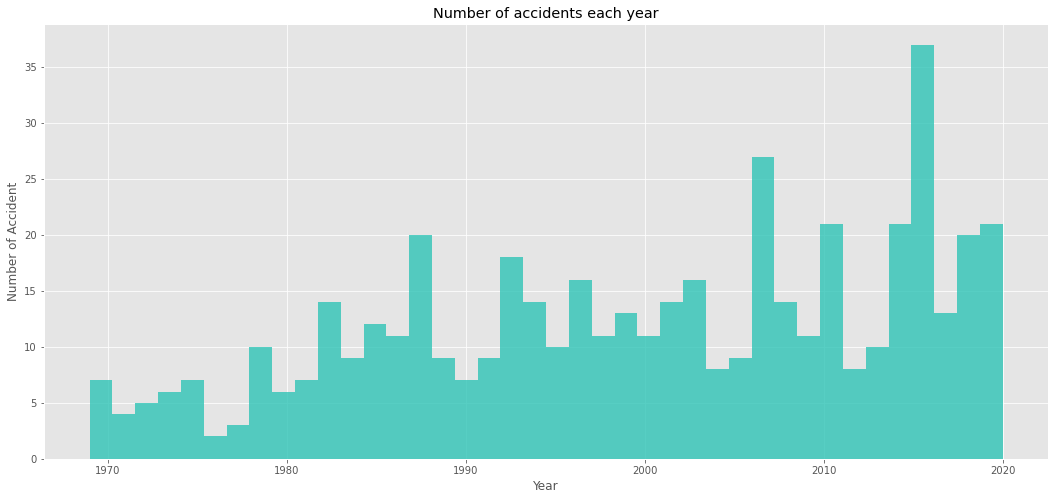

In [10]:
plt.figure(figsize=(18,8))
plt.hist(source_sht_sort.Year, bins=40, alpha=0.8, color='#2ec4b6')
plt.title('Number of accidents each year')
plt.xlabel('Year')
plt.ylabel('Number of Accident')
plt.show()

## From here follows the risk analysis part..

Each accident is already categorized by the Phase of an aircraft, when the accident occured and by the cause of accident. Inorder to start our analysis, we need to have the total kilometer (i.e... the entire Boeing 737 family aircarfts flown distance) and total number of flights (i.e... the entire Boeing 737 family aircarfts total flight)

> As of April 2020, by approximation, the total Boeing 737 aircrafts flown Kilometre is 2.89 Billon Kilometers.
> As of April 2020, by approximation, the total flights Boeing 737 aircrafts have flown is 191 Million Flights.

The analysis part comprises of
1. Finding the probability of an accident
    1. For a Kilometer
        1. Phase of an accident
        2. Cause of an accident
    2. For a Flight
        1. Phase of an accident
        2. Cause of an accident
2. Risk measurement per flight
3. Risk measurement for a Year
4. Risk measurement in each Continent

> This is sort of a dry part of this report, as everything will be tables and values. Insights are after the risk analysis part.

In [11]:
# Constants

DIST_IN_FLIGHT = 191948361
DIST_IN_KM = 289360606402

In [12]:
# To find the probability for each accident
# The total number of accidents are 491, so its divided by the constants!!

prob_per_flight = ((source_sht_sort.Fatality.count())/ DIST_IN_FLIGHT)
prob_per_km = ((source_sht_sort.Fatality.count())/ DIST_IN_KM)

In the probability of an accident for each phase/cause, the calculation resumbles as follows,

"prob_(phase/cause)_cont_(km/flight)" is the total number of accident to a particular continent with respect to each phase/cause multiplied with the probability of accident(km/flight).
"prob_per_(phase/cause)_(km/flight)" is the total number of accident to a particular phase/cause in respect to a continent, multiplied with the probability of accident(km/flight).

__"prob_(phase/cause)_(km/flight)" represents the probability for each phase/cause of accident in each continent.__

I prefer to use pivot table as its very convinent and also I have used the same in my original analysis.

In [13]:
# This function is to make the pivot table from the calculations:

def tab_generator(prob_tab, typ):
    
    "' Returns a Pivot table'"
    
    piv_tab = pd.DataFrame([prob_tab.index, prob_tab.values]).T
    piv_tab.columns = ['Location', 'Probability']
    piv_tab['Continent'] = piv_tab['Location'].apply(lambda x: x[0])
    piv_tab[typ] = piv_tab['Location'].apply(lambda x: x[1])
    piv_tab = piv_tab.drop(columns='Location')
    piv_tab.set_index('Continent')
    piv_tab = piv_tab.pivot_table(index="Continent", columns=typ, \
                         values='Probability',  \
                         aggfunc= np.sum)
    piv_tab.fillna(0, inplace=True)
    return piv_tab

## For a Kilometer

### 1. Probability for each phase of accident

In [14]:
prob_phase_cont_km = source_sht_sort.groupby(['Continent','Phase'])['Phase'].count()
prob_per_phase_km = source_sht_sort.groupby('Phase')['Phase'].count()

prob_phase_km = (prob_phase_cont_km/prob_per_phase_km).apply(lambda x: x * prob_per_km)

# To pivot table:

prob_phase_km = tab_generator(prob_phase_km, 'Phase')
prob_phase_km

Phase,Approach,En Route,Landing,Parking,Take Off,Taxing,Unknown
Continent,,,,,,,
Africa,2.121056e-10,3.616226e-10,2.011723e-10,1.305265e-10,2.610530e-10,1.475517e-10,0.000000e+00
Antarctica,0.000000e+00,0.000000e+00,2.623987e-11,6.526326e-11,0.000000e+00,0.000000e+00,0.000000e+00
Asia,5.302640e-10,5.702511e-10,6.647433e-10,5.221060e-10,4.894744e-10,1.106638e-10,4.465381e-10
Australia,0.000000e+00,0.000000e+00,8.746622e-12,0.000000e+00,0.000000e+00,1.106638e-10,0.000000e+00
Europe,3.181584e-10,3.059884e-10,2.798919e-10,2.610530e-10,2.936847e-10,5.164310e-10,0.000000e+00
North America,3.711848e-10,3.059884e-10,3.323716e-10,6.526326e-10,4.568428e-10,7.746465e-10,7.144609e-10
South America,2.651320e-10,1.529942e-10,1.836791e-10,6.526326e-11,1.957898e-10,3.688793e-11,5.358457e-10


### 2. Probability for each Cause of accident

In [15]:
prob_cause_cont_km = source_sht_sort.groupby(['Continent','Cause'])['Cause'].count()
prob_per_cause_km = source_sht_sort.groupby('Cause')['Cause'].count()

prob_cause_km = (prob_cause_cont_km/prob_per_cause_km).apply(lambda x: x * prob_per_km)

# To pivot table:

prob_cause_km = tab_generator(prob_cause_km, 'Cause')
prob_cause_km

Cause,Bird Strike,Electrical Faillure,Ground Vehicles collision,Human Error,Landing Gear Structural Damage,Manufacting Defects,Mechanical Failure,Other,Pilot Error,Sabotage,Weather
Continent,,,,,,,,,,,
Africa,1.542586e-10,0.000000e+00,0.000000e+00,1.339614e-10,3.856465e-10,4.242112e-10,2.789334e-10,2.069323e-10,1.933114e-10,2.828074e-10,2.651320e-10
Antarctica,0.000000e+00,0.000000e+00,5.473692e-11,4.465381e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.295809e-11,0.000000e+00,0.000000e+00
Asia,1.542586e-10,8.484223e-10,1.642108e-10,4.018843e-10,3.856465e-10,4.242112e-10,6.043556e-10,7.035697e-10,5.584552e-10,6.060160e-10,6.363167e-10
Australia,0.000000e+00,0.000000e+00,1.094738e-10,4.465381e-11,0.000000e+00,0.000000e+00,2.324445e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Europe,6.170344e-10,0.000000e+00,4.926323e-10,4.911919e-10,3.856465e-10,0.000000e+00,2.324445e-10,2.069323e-10,1.718324e-10,2.828074e-10,3.711848e-10
North America,7.712930e-10,0.000000e+00,8.210539e-10,5.358457e-10,2.313879e-10,8.484223e-10,4.648889e-10,2.897052e-10,5.154971e-10,3.232085e-10,2.121056e-10
South America,0.000000e+00,8.484223e-10,5.473692e-11,4.465381e-11,3.085172e-10,0.000000e+00,9.297779e-11,2.897052e-10,2.147905e-10,2.020053e-10,2.121056e-10


## For a Flight

### 1. Probability for each phase of accident

In [16]:
prob_phase_cont_flight = source_sht_sort.groupby(['Continent','Phase'])['Phase'].count()
prob_per_phase_flight = source_sht_sort.groupby('Phase')['Phase'].count()

prob_phase_flight = (prob_phase_cont_flight/prob_per_phase_flight).apply(lambda x: x * prob_per_flight)

# To pivot table:

prob_phase_flight = tab_generator(prob_phase_flight, 'Phase')
prob_phase_flight

Phase,Approach,En Route,Landing,Parking,Take Off,Taxing,Unknown
Continent,,,,,,,
Africa,3.197475e-07,5.451432e-07,3.032656e-07,1.967677e-07,3.935353e-07,2.224330e-07,0.000000e+00
Antarctica,0.000000e+00,0.000000e+00,3.955639e-08,9.838383e-08,0.000000e+00,0.000000e+00,0.000000e+00
Asia,7.993686e-07,8.596489e-07,1.002095e-06,7.870707e-07,7.378787e-07,1.668248e-07,6.731525e-07
Australia,0.000000e+00,0.000000e+00,1.318546e-08,0.000000e+00,0.000000e+00,1.668248e-07,0.000000e+00
Europe,4.796212e-07,4.612750e-07,4.219348e-07,3.935353e-07,4.427272e-07,7.785155e-07,0.000000e+00
North America,5.595580e-07,4.612750e-07,5.010476e-07,9.838383e-07,6.886868e-07,1.167773e-06,1.077044e-06
South America,3.996843e-07,2.306375e-07,2.768947e-07,9.838383e-08,2.951515e-07,5.560825e-08,8.077830e-07


In [24]:
prob_cause_cont_flight = source_sht_sort.groupby(['Continent','Cause'])['Cause'].count()
prob_per_cause_flight = source_sht_sort.groupby('Cause')['Cause'].count()

prob_cause_flight = (prob_cause_cont_km/prob_per_cause_km).apply(lambda x: x * prob_per_flight)

# To pivot table:

prob_cause_flight = tab_generator(prob_cause_flight, 'Cause')
prob_cause_flight

Cause,Bird Strike,Electrical Faillure,Ground Vehicles collision,Human Error,Landing Gear Structural Damage,Manufacting Defects,Mechanical Failure,Other,Pilot Error,Sabotage,Weather
Continent,,,,,,,,,,,
Africa,2.325436e-07,0.000000,0.000000e+00,2.019458e-07,5.813590e-07,6.394949e-07,4.204898e-07,3.119487e-07,2.914154e-07,4.263299e-07,3.996843e-07
Antarctica,0.000000e+00,0.000000,8.251547e-08,6.731525e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.475898e-08,0.000000e+00,0.000000e+00
Asia,2.325436e-07,0.000001,2.475464e-07,6.058373e-07,5.813590e-07,6.394949e-07,9.110612e-07,1.060626e-06,8.418667e-07,9.135642e-07,9.592424e-07
Australia,0.000000e+00,0.000000,1.650309e-07,6.731525e-08,0.000000e+00,0.000000e+00,3.504082e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Europe,9.301744e-07,0.000000,7.426393e-07,7.404678e-07,5.813590e-07,0.000000e+00,3.504082e-07,3.119487e-07,2.590359e-07,4.263299e-07,5.595580e-07
North America,1.162718e-06,0.000000,1.237732e-06,8.077830e-07,3.488154e-07,1.278990e-06,7.008163e-07,4.367282e-07,7.771077e-07,4.872342e-07,3.197475e-07
South America,0.000000e+00,0.000001,8.251547e-08,6.731525e-08,4.650872e-07,0.000000e+00,1.401633e-07,4.367282e-07,3.237949e-07,3.045214e-07,3.197475e-07


## 2. Risk measurement calculations..

The accidents are usually categorized by the risk value (i.e... The total number fatality in an accident)

These categorie of lossess are defined in the following order...
> 1. **Cat-1** --> The accidents with no fatality.
> 2. **Cat-2** --> The accidents with less than 25% fatality.
> 3. **Cat-3** --> The accidents with less than 50% fatality.
> 4. **Cat-4** --> The accidents with more than 50%, but less than 99% fatality.
> 5. **Cat-5** --> The accidents with 100% fatality.

In finding the risk value, we can use either the probability of an accident for km or flight. I have used the probability of an  accident for a flight. And it is usually calculated for the accident causes.

In [25]:
# Cat_mst is the Category measurement pivot table:

cat_mst = source_sht_sort.groupby(['Continent', 'Category'])['Category'].count()
cat_mst = tab_generator(cat_mst, "Category of Loss")
cat_mst

Category of Loss,Cat-1,Cat-2,Cat-3,Cat-4,Cat-5
Continent,,,,,
Africa,51.0,4.0,1.0,4.0,7.0
Antarctica,3.0,1.0,0.0,0.0,0.0
Asia,110.0,16.0,2.0,9.0,21.0
Australia,4.0,0.0,0.0,0.0,0.0
Europe,71.0,5.0,2.0,2.0,7.0
North America,103.0,8.0,0.0,5.0,4.0
South America,37.0,6.0,1.0,2.0,5.0


#### Filtering out the outliers

As the continent "__Antarctica__" and "__Australia__" have a total of 8 accidents with one "__Cat-2__" in antarctica. So, we can filter out both the continents as outliers. The "__Cat-1__" accidents can be omitted to better present the data graphically.
So, these were the accidents that have resulted in atleast a 1% fatality.

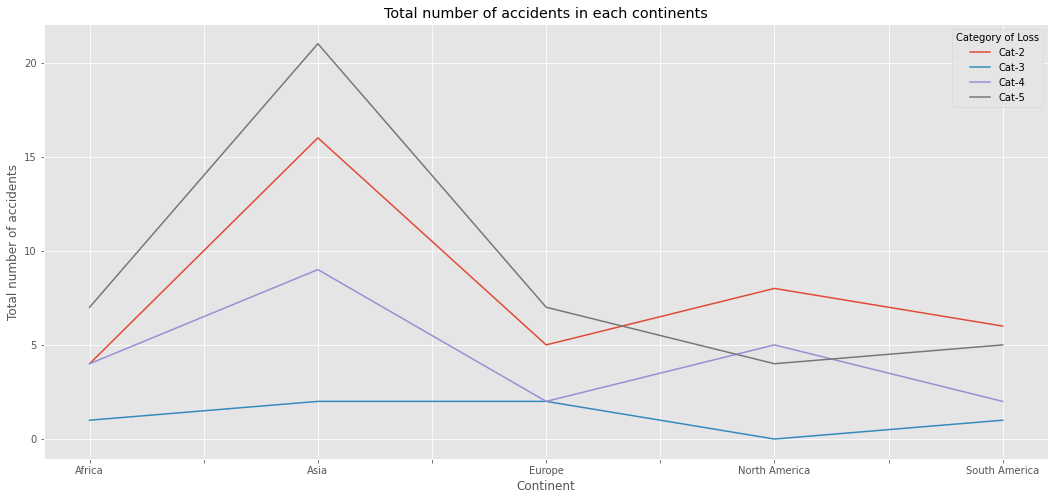

In [26]:
cat_criteria = ((cat_mst.index != 'Antarctica') & (cat_mst.index != 'Australia'))
cat_mst[cat_criteria].filter(items=['Cat-2','Cat-3','Cat-4', 'Cat-5']).plot(figsize=(18,8))
plt.title('Total number of accidents in each continents')
plt.ylabel('Total number of accidents')
plt.show()

Contructing a pivot table, by relating the Cause and Category.

In [27]:
# Total number of accidents in each category.
cat_risk = source_sht_sort.groupby(['Cause', 'Category'])['Category'].count()
cat_ptab = tab_generator(cat_risk, 'Category of Loss')
cat_ptab.index.name = 'Cause'
cat_ptab

Category of Loss,Cat-1,Cat-2,Cat-3,Cat-4,Cat-5
Cause,,,,,
Bird Strike,10.0,0.0,1.0,0.0,0.0
Electrical Faillure,0.0,1.0,0.0,0.0,1.0
Ground Vehicles collision,31.0,0.0,0.0,0.0,0.0
Human Error,26.0,2.0,1.0,3.0,6.0
Landing Gear Structural Damage,22.0,0.0,0.0,0.0,0.0
Manufacting Defects,2.0,0.0,0.0,0.0,2.0
Mechanical Failure,56.0,3.0,2.0,4.0,8.0
Other,28.0,6.0,0.0,1.0,6.0
Pilot Error,48.0,7.0,1.0,7.0,16.0


### Risk of an accident of each category of loss per undesirable event (Pj)

This can be calculated by dividing the category loss in each cause to the total category loss. And the total number accidents in each cause, which is the 'prob_per_cause_flight'.

> Pj = (Total number of accidents in that category for a cause )/(Total number of accidents for that cause))

In [142]:
pj = (cat_ptab.T / prob_per_cause_flight).T
pj

Category of Loss,Cat-1,Cat-2,Cat-3,Cat-4,Cat-5
Cause,,,,,
Bird Strike,0.909091,0.000000,0.090909,0.000000,0.000000
Electrical Faillure,0.000000,0.500000,0.000000,0.000000,0.500000
Ground Vehicles collision,1.000000,0.000000,0.000000,0.000000,0.000000
Human Error,0.684211,0.052632,0.026316,0.078947,0.157895
Landing Gear Structural Damage,1.000000,0.000000,0.000000,0.000000,0.000000
Manufacting Defects,0.500000,0.000000,0.000000,0.000000,0.500000
Mechanical Failure,0.767123,0.041096,0.027397,0.054795,0.109589
Other,0.682927,0.146341,0.000000,0.024390,0.146341
Pilot Error,0.607595,0.088608,0.012658,0.088608,0.202532


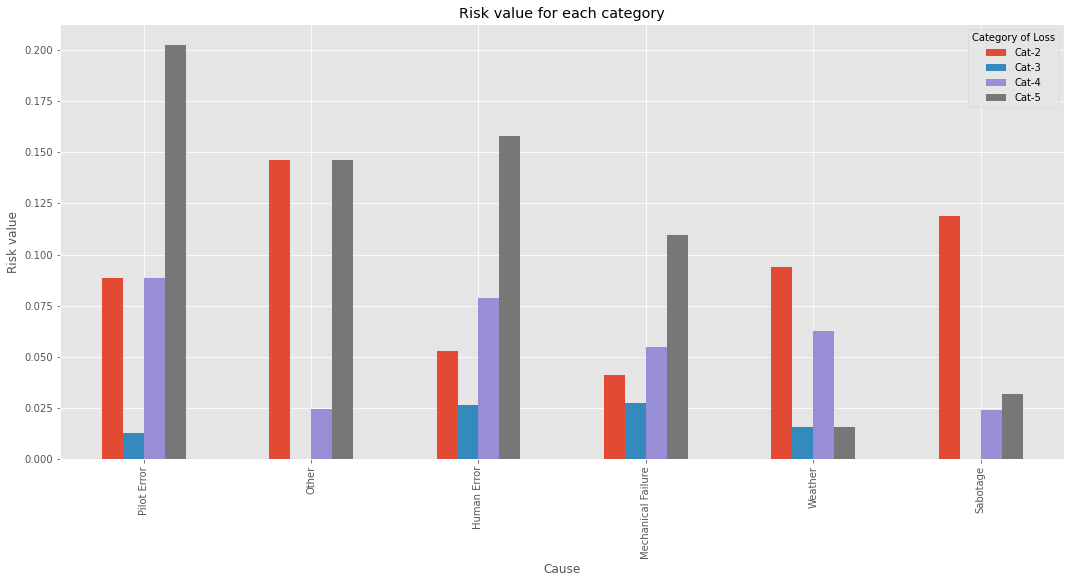

In [189]:
pj.sort_values(by='Cat-1').iloc[2:-3].\
            filter(items=(['Cat-2', 'Cat-3', 'Cat-4', 'Cat-5'])).\
            plot(kind='bar', figsize=(18,8))

plt.ylabel('Risk value')
plt.title('Risk value for each category')
plt.show()


## 2. Risk Measurement per Flight in each Category [R(1/Flight)]

> Typical formula to calculate the hazard measurement (zj).

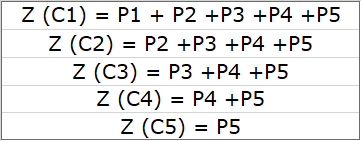

So, for this calculation, it is better to construct a table by adding the calculated values to the table.

> R[1/Flight] = probability of an accident for each cause * zj

In [168]:
zj = pj.copy()
zj['Cat-1'] = pj['Cat-1'] + pj['Cat-2'] + pj['Cat-3'] + pj['Cat-4'] + pj['Cat-5']
zj['Cat-2'] = pj['Cat-2'] + pj['Cat-3'] + pj['Cat-4'] + pj['Cat-5']
zj['Cat-3'] = pj['Cat-3'] + pj['Cat-4'] + pj['Cat-5']
zj['Cat-4'] = pj['Cat-4'] + pj['Cat-5']

Now, the probability of an accident for a cause should be multiplied with the each cause. And then each category should be multiplied to each cause.

In [166]:
cause_prob = prob_per_cause_flight * prob_per_flight

# R[1/flight]

r_per_flight = (zj.T * cause_prob).T
r_per_flight


Category of Loss,Cat-1,Cat-2,Cat-3,Cat-4,Cat-5
Cause,,,,,
Bird Strike,0.000028,0.000003,0.000003,0.000000,0.000000
Electrical Faillure,0.000005,0.000005,0.000003,0.000003,0.000003
Ground Vehicles collision,0.000079,0.000000,0.000000,0.000000,0.000000
Human Error,0.000097,0.000031,0.000026,0.000023,0.000015
Landing Gear Structural Damage,0.000056,0.000000,0.000000,0.000000,0.000000
Manufacting Defects,0.000010,0.000005,0.000005,0.000005,0.000005
Mechanical Failure,0.000187,0.000043,0.000036,0.000031,0.000020
Other,0.000105,0.000033,0.000018,0.000018,0.000015
Pilot Error,0.000202,0.000079,0.000061,0.000059,0.000041


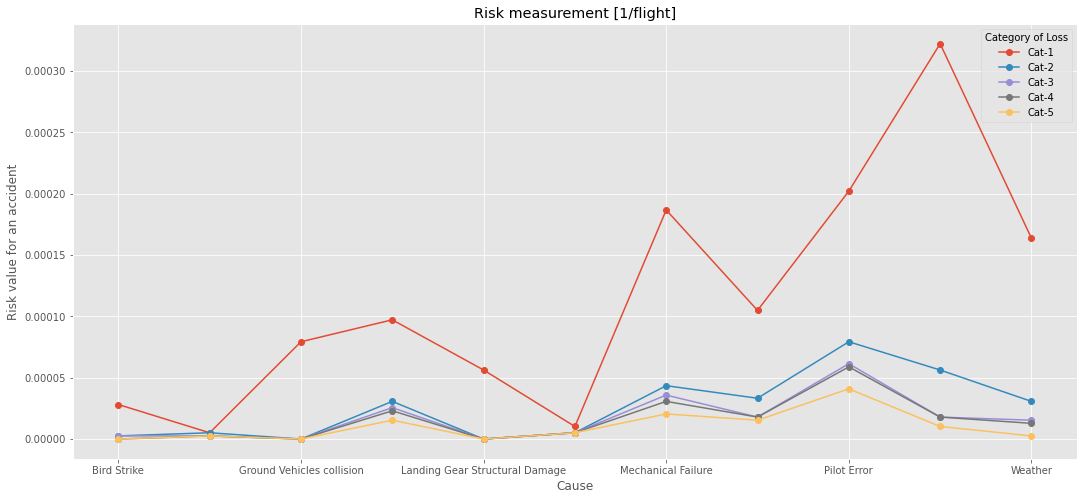

In [173]:
r_per_flight.plot(figsize=(18,8), marker="o")
plt.ylabel('Risk value for an accident')
plt.title('Risk measurement [1/flight]')
plt.show()

## 3. Risk measurement for a Year

> R[1/Year] = Q_Accident × zj

> Q_Accident = Total Number of Accidents in each Cause for a  period of Time (wj ) / Total Time Period

Where, wj  values taken from 1969 to 2020
Total period is from 1969 to 2020,which is 51 Years


In [185]:
q_acc = ((prob_per_cause_flight / 51) * zj.T).T
q_acc

Category of Loss,Cat-1,Cat-2,Cat-3,Cat-4,Cat-5
Cause,,,,,
Bird Strike,0.215686,0.019608,0.019608,0.000000,0.000000
Electrical Faillure,0.039216,0.039216,0.019608,0.019608,0.019608
Ground Vehicles collision,0.607843,0.000000,0.000000,0.000000,0.000000
Human Error,0.745098,0.235294,0.196078,0.176471,0.117647
Landing Gear Structural Damage,0.431373,0.000000,0.000000,0.000000,0.000000
Manufacting Defects,0.078431,0.039216,0.039216,0.039216,0.039216
Mechanical Failure,1.431373,0.333333,0.274510,0.235294,0.156863
Other,0.803922,0.254902,0.137255,0.137255,0.117647
Pilot Error,1.549020,0.607843,0.470588,0.450980,0.313725


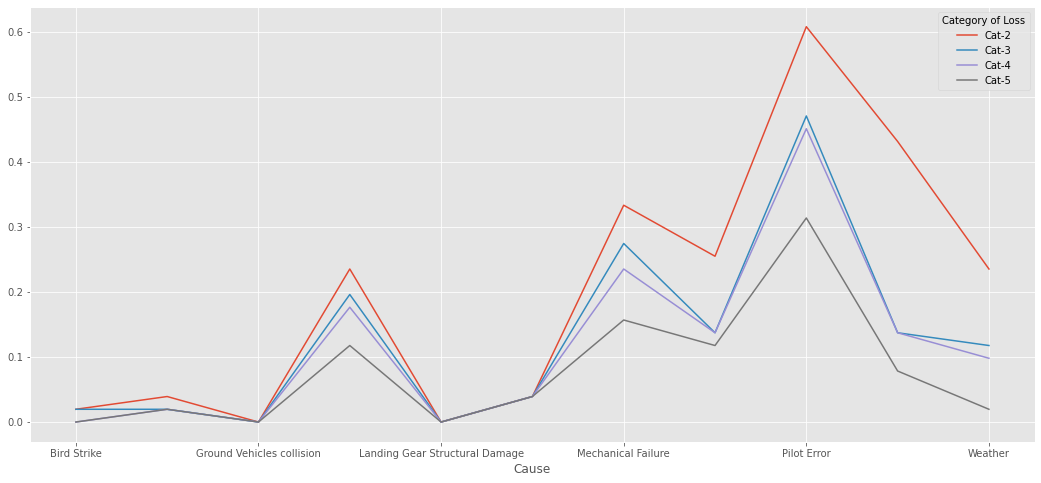

In [187]:
q_acc.filter(items=(['Cat-2', 'Cat-3', 'Cat-4', 'Cat-5'])).plot(figsize=(18,8))

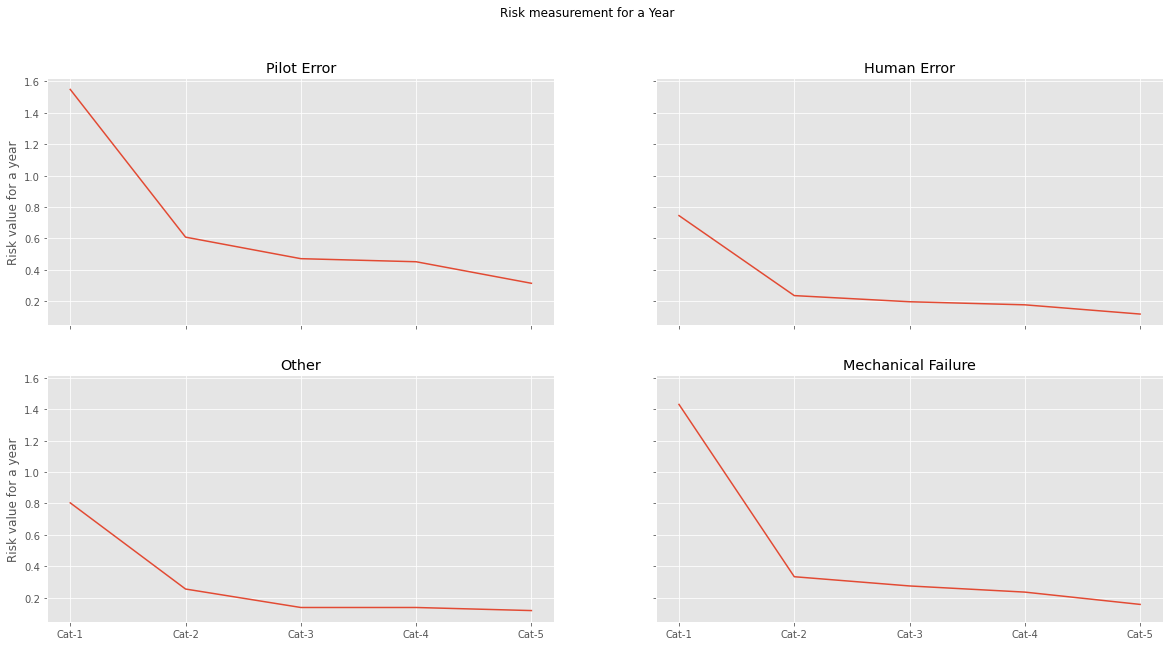

In [240]:
fig, ax = plt.subplots(2,2, sharey=True, sharex=True, figsize=(20,10))

ax[0,0].plot(q_acc.loc['Pilot Error'])
ax[0,0].set_title('Pilot Error')
ax[0,0].set_ylabel('Risk value for a year')
ax[0,1].plot(q_acc.loc['Human Error'])
ax[0,1].set_title('Human Error')
ax[1,0].plot(q_acc.loc['Other'])
ax[1,0].set_title('Other')
ax[1,0].set_ylabel('Risk value for a year')
ax[1,1].plot(q_acc.loc['Mechanical Failure'])
ax[1,1].set_title('Mechanical Failure')

fig.suptitle('Risk measurement for a Year')

plt.show()

## 4. Risk measurement in each Continent

Now, we can calculate the risk in each continent, except for "__Australia__" and "__Antarctica__". It will be the same calculation, but only for the analysing continent.

Okay!, First we can look the continents with larger number of accidents.

In [243]:
cat_mst.sort_values(by='Cat-1', ascending= False)

Category of Loss,Cat-1,Cat-2,Cat-3,Cat-4,Cat-5
Continent,,,,,
Asia,110.0,16.0,2.0,9.0,21.0
North America,103.0,8.0,0.0,5.0,4.0
Europe,71.0,5.0,2.0,2.0,7.0
Africa,51.0,4.0,1.0,4.0,7.0
South America,37.0,6.0,1.0,2.0,5.0
Australia,4.0,0.0,0.0,0.0,0.0
Antarctica,3.0,1.0,0.0,0.0,0.0


### 1. Risk measurement in Asia

Asia tops the list in each category. Majority of the accidents were man made errors.

In [249]:
source_sht.head()

,Date,Year,Operator,Aircraft Model,Type,Flight Cycles,Fight Nature,First Flight,Total Airframe Hours,Time,Cause,Type of Mechanical Failure,Phase,Fatality,Category,Aircraft Damage,Location,Country,Continent,Ground Casualties
0,25343,1969,Avianca,Boeing 737-159,Boeing 737-100,NaN,Domestic Scheduled Passenger,25135.0,NaN,NaN,Sabotage,NaN,En Route,0,Cat-1,No,"Havana-José Martí International Airport (HAV),...",Cuba,North America,NaN
1,25683,1970,VASP - Viação Aérea São Paulo,Boeing 737-2A1,Boeing 737-200,NaN,Unknown,25382.0,NaN,NaN,Sabotage,NaN,Unknown,0,Cat-1,No,"Guyana, Cuba",NaN,North America,NaN
2,25702,1970,VASP - Viação Aérea São Paulo,Boeing 737-200,Boeing 737-200,NaN,Unknown,NaN,NaN,NaN,Sabotage,NaN,Unknown,0,Cat-1,No,"Guyana, Curacao",Curacao,South America,NaN
3,25745,1970,Avianca,Boeing 737-159,Boeing 737-100,NaN,Domestic Scheduled Passenger,25135.0,NaN,NaN,Sabotage,NaN,En Route,0,Cat-1,No,"Havana-José Martí International Airport (HAV),...",Cuba,North America,NaN
4,25768,1970,United Airlines,Boeing 737-222,Boeing 737-200,NaN,Domestic Scheduled Passenger,24897.0,3956.0,0.796528,Manufacting Defects,Engine Failure,Take Off,0,Cat-1,Yes,"Philadelphia International Airport, PA (PHL), USA",USA,North America,NaN


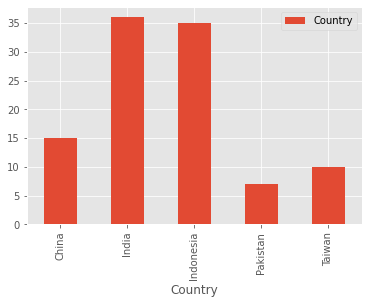

In [283]:
asia_cnt = pd.DataFrame(source_sht[source_sht.Continent == 'Asia'].groupby('Country')['Country'].count())

#plt.bar(asia_cnt)
asia_cnt[asia_cnt.Country > 5].plot.bar()